# Spotify Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import numpy as np

### Load the Dataset

In [3]:
# Load the dataset

df = pd.read_csv('/Users/kavian/Desktop/ML Project/Spotify/Dataset/spotify_tracks.csv')

### Investigating the Data

In [32]:
df.head()

,id,name,genre,artists,album,popularity,duration_ms,explicit
0,7kr3xZk4yb3YSZ4VFtg2Qt,Acoustic,acoustic,Billy Raffoul,1975,58,172199,False
1,1kJygfS4eoVziBBI93MSYp,Acoustic,acoustic,Billy Raffoul,A Few More Hours at YYZ,57,172202,False
2,6lynns69p4zTCRxmmiSY1x,Here Comes the Sun - Acoustic,acoustic,"Molly Hocking, Bailey Rushlow",Here Comes the Sun (Acoustic),42,144786,False
3,1RC9slv335IfLce5vt9KTW,Acoustic #3,acoustic,The Goo Goo Dolls,Dizzy up the Girl,46,116573,False
4,5o9L8xBuILoVjLECSBi7Vo,My Love Mine All Mine - Acoustic Instrumental,acoustic,"Guus Dielissen, Casper Esmann",My Love Mine All Mine (Acoustic Instrumental),33,133922,False


In [6]:
# Summary of the dataset
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           6300 non-null   object
 1   name         6300 non-null   object
 2   genre        6300 non-null   object
 3   artists      6300 non-null   object
 4   album        6300 non-null   object
 5   popularity   6300 non-null   int64 
 6   duration_ms  6300 non-null   int64 
 7   explicit     6300 non-null   bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 350.8+ KB
None


In [7]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id             0
name           0
genre          0
artists        0
album          0
popularity     0
duration_ms    0
explicit       0
dtype: int64


In [8]:
# Data Cleaning: Fill or Drop missing values if any (assuming minimal cleaning needed for this example)
df.dropna(inplace=True)

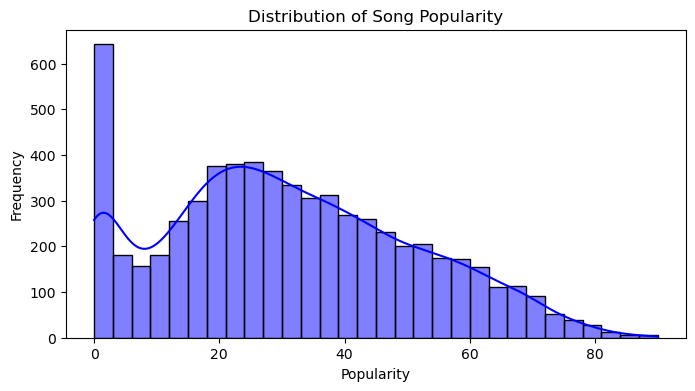

In [10]:
# Distribution of Popularity
plt.figure(figsize=(8, 4))
sns.histplot(df['popularity'], bins=30, kde=True, color='blue')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [26]:
#Converting the duration metric from ms to minutes
new_df = df

In [33]:
new_df['duration_ms'] = (new_df['duration_ms'])/60000

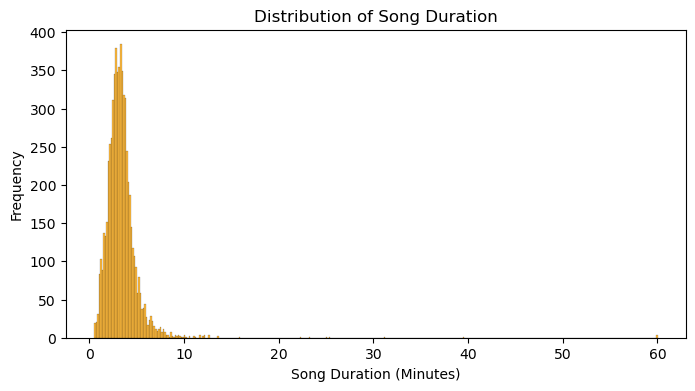

In [38]:
# Song Duration
plt.figure(figsize=(8, 4))
sns.histplot(new_df['duration_ms'], color='orange')
plt.title('Distribution of Song Duration')
plt.xlabel('Song Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()

It seems that there are some outliers for songs over 15 mins which probably are podcasts, or live concert that we can remove them from the dataset.

In [35]:
# 15 minutes songs could be considered the max song duration.
threshold = 15  
df_filtered = df[df['duration_ms'] <= threshold]

Now, let's plot the dataset once again to see how it looks like after removing the outliers.

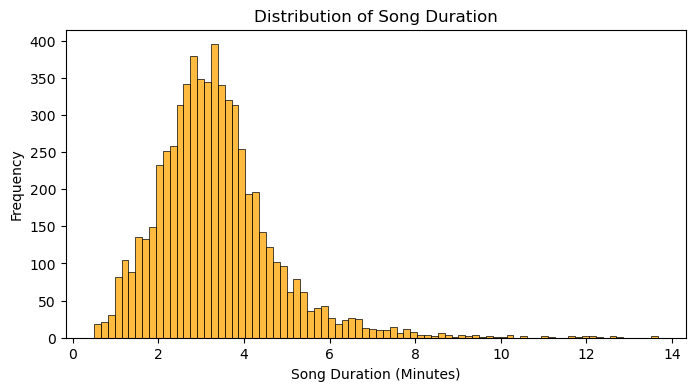

In [37]:
# Song Duration after removing the outliers
plt.figure(figsize=(8, 4))
sns.histplot(df_filtered['duration_ms'], color='orange')
plt.title('Distribution of Song Duration')
plt.xlabel('Song Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()